In [15]:
import sys
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtWidgets import QMainWindow, QCheckBox,  QApplication, QWidget, QPushButton, QAction, QLineEdit, QMessageBox, QInputDialog, QLabel
from PyQt5.QtGui import *  
from PyQt5.QtCore import QSize 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import datetime as dt
import bs4 as bs
import pickle
import requests
import os
import time
from yahoo_finance import Share
%matplotlib inline

style.use('ggplot')

In [2]:
def create_csv(stock='TSLA',start=dt.datetime(2017,1,1)):

    now = dt.datetime.now()
    end=dt.datetime(now.year,now.month,now.day)
    
    dataframe = web.DataReader(stock,'yahoo',start,end)
    
    TSLA = dataframe.to_csv('stock_dfs/{}.csv'.format(stock))

In [3]:
def read_csv(stock='TSLA'):
    
    df=pd.read_csv('stock_dfs/{}.csv'.format(stock),parse_dates=True,index_col=0)
    
    df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()
    df['40ma']=df['Adj Close'].rolling(window=40,min_periods=0).mean()
    df['20ma']=df['Adj Close'].rolling(window=20,min_periods=0).mean()
    
    ax1=plt.subplot2grid((6,3),(0,0),rowspan=5,colspan=3,ylabel='Stock Price',title=stock)
    ax2=plt.subplot2grid((6,3),(5,0),rowspan=1,colspan=3,sharex=ax1)
    
    ax1.plot(df.index,df['Adj Close'])
    ax1.plot(df.index,df['100ma'])
    ax1.plot(df.index,df['40ma'])
    ax1.plot(df.index,df['20ma'])
    ax2.plot(df.index,df['Volume'],color='black')
    

In [4]:
def save_sp500_tickers():
    
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    stock_names = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        stock_names.append(ticker)
            
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(stock_names,f)
        
    print(stock_names)
    
    return stock_names

In [5]:
def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500==True:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start=dt.datetime(2017,1,1)
    now = dt.datetime.now()
    end=dt.datetime(now.year,now.month,now.day)
    
    for ticker in tickers[:100]:
        try:
            if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
                df=web.DataReader(ticker,'yahoo',start,end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            #else:
                #print('Already have {}'.format(ticker))
        except:
            create_csv(ticker)

In [16]:
def test():
    
    tesla=Share('YHOO')
    tesla.get_price()
    
test()

YQLResponseMalformedError: Response malformed.

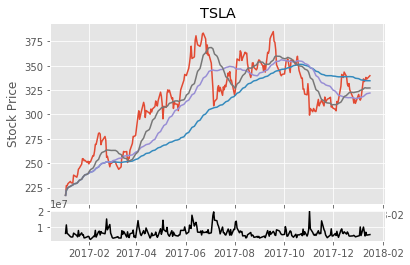

In [8]:
def main(name):
    
    name=str(name)
    start=dt.datetime(2017,1,1)
    
    #get_data_from_yahoo()
    
    create_csv(name,start)
    read_csv(name)

    plt.show()
    
main('TSLA')